In [ ]:
pip install --user pandas numpy matplotlib seaborn scipy scikit-learn

Step 1: Setup and Importing Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set plot styling
# plt.style.use('seaborn-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14

# Display all columns
pd.set_option('display.max_columns', None)

Step 2: Loading and Examining the Dataset

In [ ]:
# Read the CSV file
df = pd.read_csv('swiggy.csv')

# Display first few rows
print("First few rows of the dataset:")
display(df.head())

# Display basic information about the dataset
print("\nDataset Information:")
display(df.info())

# Display basic statistics
print("\nBasic Statistics:")
display(df.describe())

First few rows of the dataset:


,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


None


Basic Statistics:


,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


step 3: Data Cleaning and Preparation

In [ ]:
# Check for missing values
print("Missing Values in Each Column:")
display(df.isnull().sum())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Convert Food type to list for better analysis
df['Food_type_list'] = df['Food type'].str.split(',')

# Get unique food types
all_food_types = set([item.strip() for sublist in df['Food_type_list'] for item in sublist if isinstance(sublist, list)])
print(f"\nNumber of Unique Food Types: {len(all_food_types)}")
print("\nSample of Food Types:")
print(list(all_food_types)[:10])

# Create price range categories for better insights
df['Price_Range'] = pd.cut(df['Price'],
                          bins=[0, 200, 400, 600, 1000, 2000],
                          labels=['Budget', 'Affordable', 'Mid-range', 'Premium', 'Luxury'])

# Create a function to get the primary food type (first in the list)
def get_primary_food(food_list):
    if isinstance(food_list, list) and len(food_list) > 0:
        return food_list[0].strip()
    return None

df['Primary_Food'] = df['Food_type_list'].apply(get_primary_food)

# Display the updated dataframe
display(df[['Restaurant', 'Price', 'Price_Range', 'Food type', 'Primary_Food']].head())

Missing Values in Each Column:


,0
ID,0
Area,0
City,0
Restaurant,0
Price,0
Avg ratings,0
Total ratings,0
Food type,0
Address,0
Delivery time,0



Number of duplicate rows: 0

Number of Unique Food Types: 600

Sample of Food Types:
['Hyderabadi', 'Oriya', 'Italian  Lebanese  Chinese  Indian  Mexican  Biryani  Pan-Asian  Asian  Salads  American', 'Chinese  Thai  Asian', 'Tandoor  Indian', 'North Indian  South Indian', 'North Indian  Combo  Street Food  Fast Food  Beverages', 'Keto', 'Snacks  Desserts  Sweets  Chaat', 'Street Food  North Indian  Chinese  South Indian']


,Restaurant,Price,Price_Range,Food type,Primary_Food
0,Tandoor Hut,300.0,Affordable,"Biryani,Chinese,North Indian,South Indian",Biryani
1,Tunday Kababi,300.0,Affordable,"Mughlai,Lucknowi",Mughlai
2,Kim Lee,650.0,Premium,Chinese,Chinese
3,New Punjabi Hotel,250.0,Affordable,"North Indian,Punjabi,Tandoor,Chinese",North Indian
4,Nh8,350.0,Affordable,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",Rajasthani


Analysis 1 - Geographic Distribution Analysis

<ipython-input-7-9f6002e5fc42>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.values, y=city_counts.index, ax=axes[0], palette='viridis')
<ipython-input-7-9f6002e5fc42>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_city.values, y=avg_price_city.index, ax=axes[1], palette='viridis')


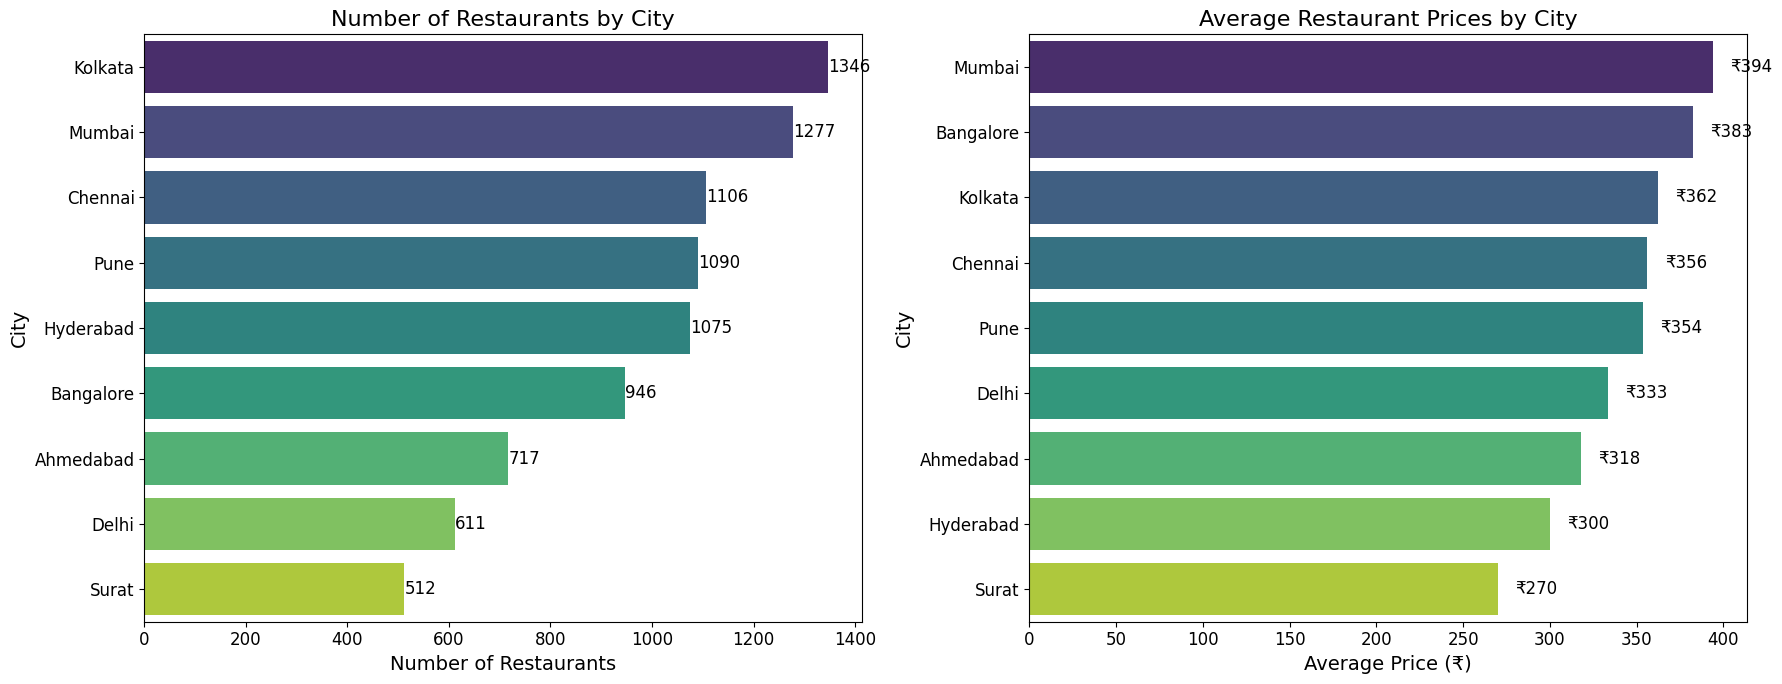

<ipython-input-7-9f6002e5fc42>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')


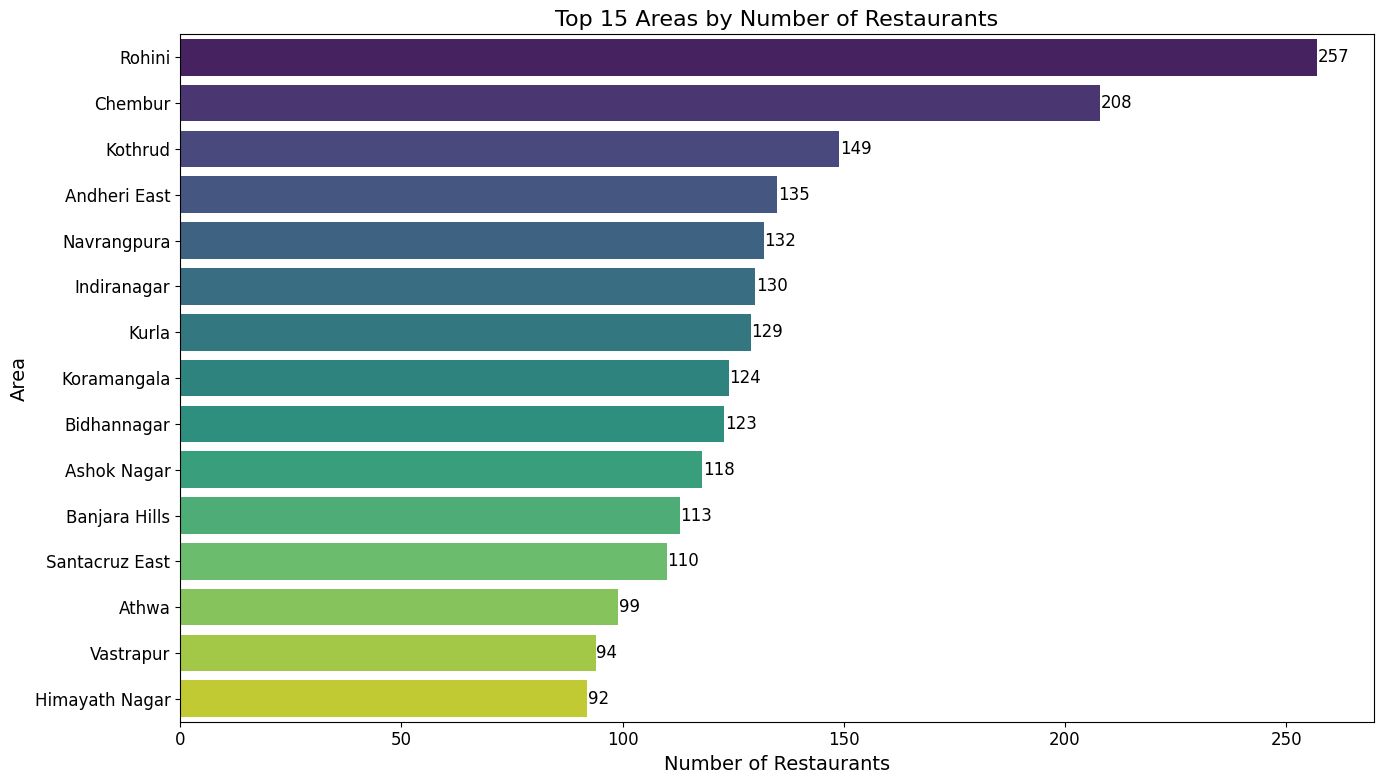

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Distribution of restaurants across cities
city_counts = df['City'].value_counts()
sns.barplot(x=city_counts.values, y=city_counts.index, ax=axes[0], palette='viridis')
axes[0].set_title('Number of Restaurants by City')
axes[0].set_xlabel('Number of Restaurants')
axes[0].set_ylabel('City')

# Plot 2: Average restaurant prices by city
avg_price_city = df.groupby('City')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_city.values, y=avg_price_city.index, ax=axes[1], palette='viridis')
axes[1].set_title('Average Restaurant Prices by City')
axes[1].set_xlabel('Average Price (₹)')
axes[1].set_ylabel('City')

# Add annotations with values
for i, v in enumerate(city_counts.values):
    axes[0].text(v + 0.5, i, f"{v}", va='center')

for i, v in enumerate(avg_price_city.values):
    axes[1].text(v + 10, i, f"₹{v:.0f}", va='center')

plt.tight_layout()
plt.show()

# Analysis of areas with the most restaurants
top_areas = df['Area'].value_counts().head(15)

plt.figure(figsize=(14, 8))
bars = sns.barplot(x=top_areas.values, y=top_areas.index, palette='viridis')
plt.title('Top 15 Areas by Number of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Area')

# Add value labels to bars
for i, v in enumerate(top_areas.values):
    plt.text(v + 0.1, i, f"{v}", va='center')

plt.tight_layout()
plt.show()

 Analysis 2 - Rating Analysis

<ipython-input-8-71d4b5ec3e9a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price_Range', y='Avg ratings', data=df, palette='viridis')
<ipython-input-8-71d4b5ec3e9a>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_city.values, y=avg_rating_city.index, palette='viridis')


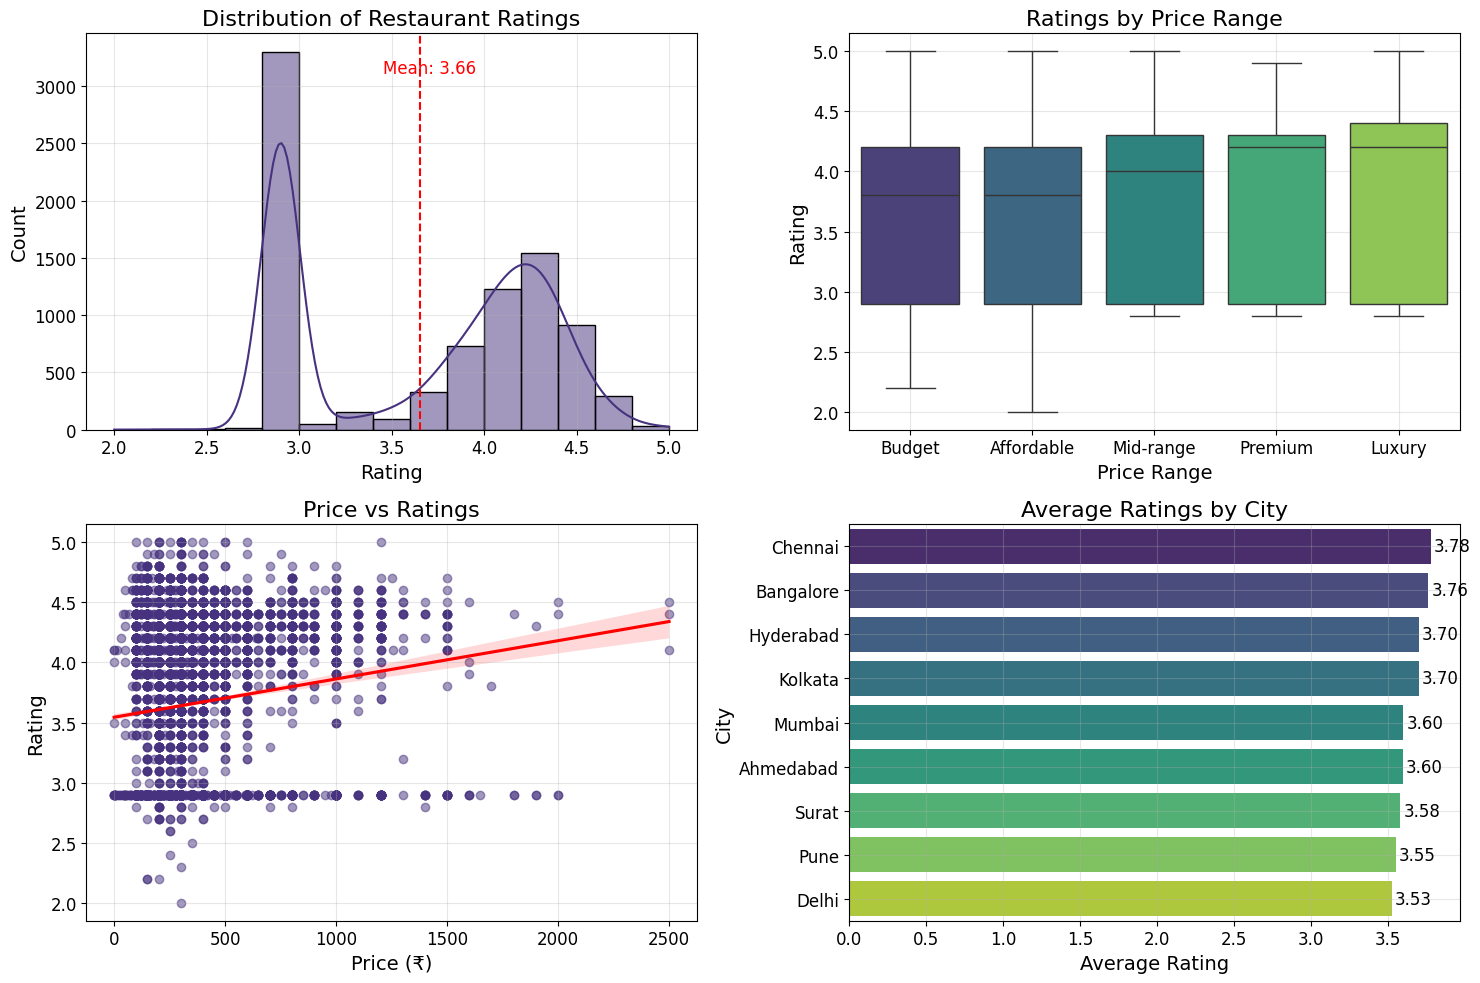

Correlation between Price and Ratings: 0.114

Hypothesis Test: Is there a significant correlation between price and ratings?
Pearson correlation coefficient: 0.114
P-value: 0.0000
Result: There is a statistically significant correlation between price and ratings.


In [ ]:
plt.figure(figsize=(15, 10))

# Create a 2x2 subplot grid
plt.subplot(2, 2, 1)
# Distribution of ratings
sns.histplot(df['Avg ratings'], bins=15, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

# Add mean line and annotation
mean_rating = df['Avg ratings'].mean()
plt.axvline(mean_rating, color='red', linestyle='--')
plt.text(mean_rating - 0.2, plt.ylim()[1] * 0.9, f'Mean: {mean_rating:.2f}', color='red')

plt.subplot(2, 2, 2)
# Relationship between ratings and price using box plot
sns.boxplot(x='Price_Range', y='Avg ratings', data=df, palette='viridis')
plt.title('Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
# Relationship between ratings and price using scatter plot
sns.regplot(x='Price', y='Avg ratings', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Price vs Ratings')
plt.xlabel('Price (₹)')
plt.ylabel('Rating')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
# Average ratings by city
avg_rating_city = df.groupby('City')['Avg ratings'].mean().sort_values(ascending=False)
sns.barplot(x=avg_rating_city.values, y=avg_rating_city.index, palette='viridis')
plt.title('Average Ratings by City')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.grid(True, alpha=0.3)

# Add value annotations
for i, v in enumerate(avg_rating_city.values):
    plt.text(v + 0.02, i, f"{v:.2f}", va='center')

plt.tight_layout()
plt.show()

# Calculate correlation between price and ratings
correlation = df['Price'].corr(df['Avg ratings'])
print(f"Correlation between Price and Ratings: {correlation:.3f}")
print("\nHypothesis Test: Is there a significant correlation between price and ratings?")
# Perform significance test
from scipy.stats import pearsonr
corr, p_value = pearsonr(df['Price'], df['Avg ratings'])
print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: There is a statistically significant correlation between price and ratings.")
else:
    print("Result: There is no statistically significant correlation between price and ratings.")

 Analysis -3 : Delivery Time Analysis

<ipython-input-9-9b235cce394e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='City', y='Delivery time', palette='viridis')
<ipython-input-9-9b235cce394e>:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_delivery_price = df.groupby('Price_Range')['Delivery time'].mean()
<ipython-input-9-9b235cce394e>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_delivery_price.index, y=avg_delivery_price.values, palette='viridis')


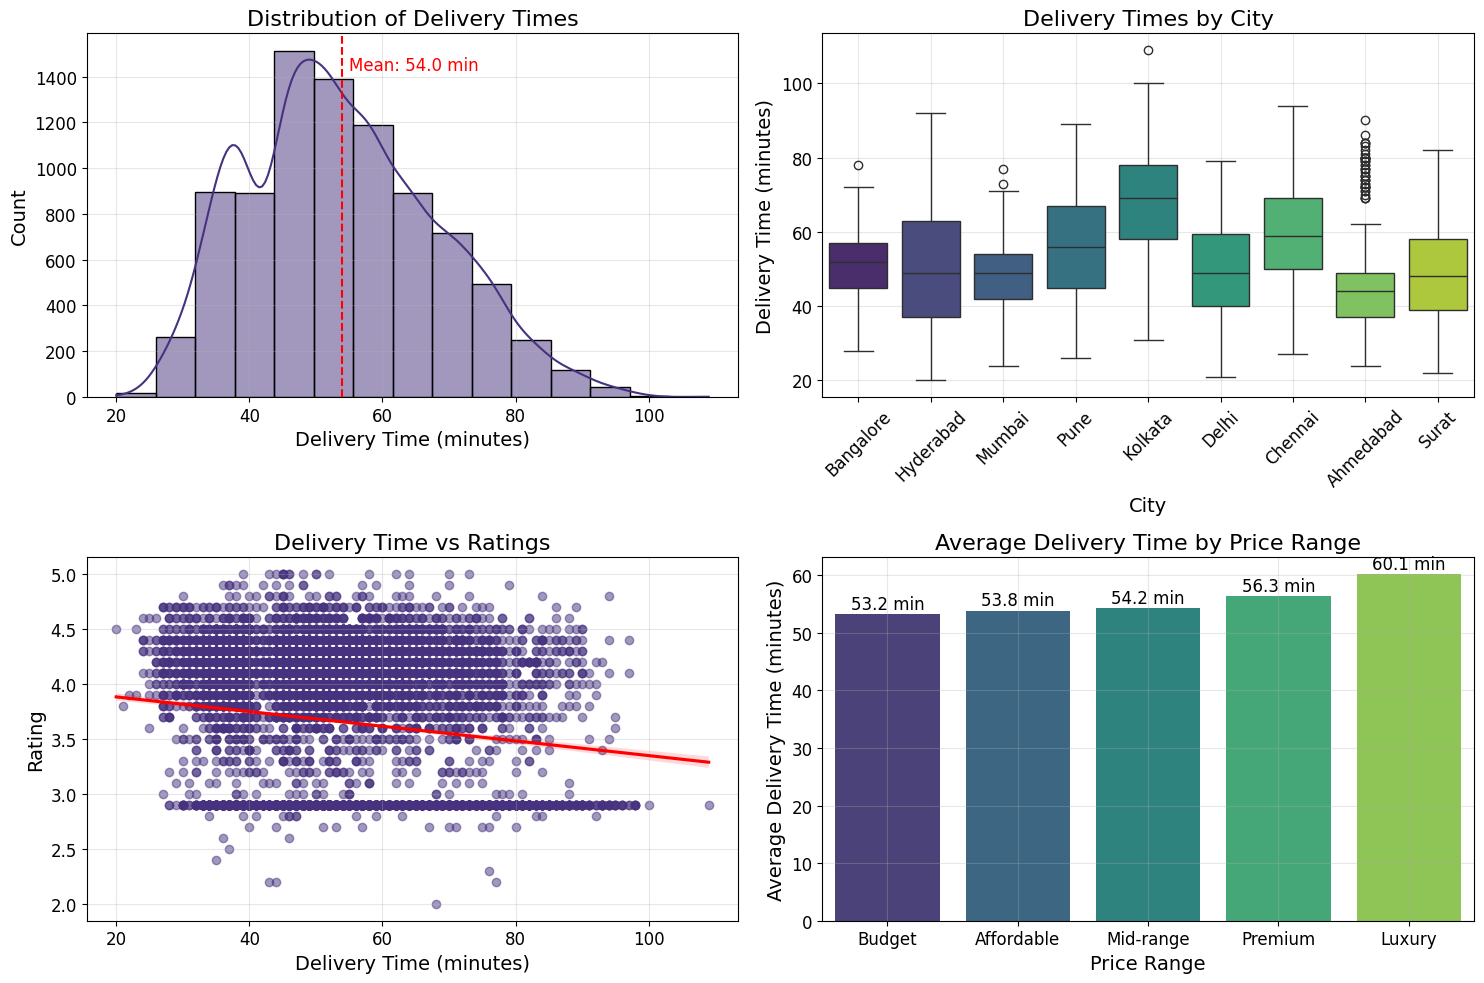

Hypothesis Test: Is there a difference in delivery times between cities?
ANOVA F-statistic: 360.078
P-value: 0.0000
Result: There is a statistically significant difference in delivery times between cities.

Mean Delivery Times by City:
Ahmedabad: 44.7 minutes
Mumbai: 48.3 minutes
Surat: 48.5 minutes
Hyderabad: 49.9 minutes
Bangalore: 50.5 minutes
Delhi: 50.7 minutes
Pune: 55.9 minutes
Chennai: 59.0 minutes
Kolkata: 67.8 minutes


In [ ]:
plt.figure(figsize=(15, 10))

# Create a 2x2 subplot grid
plt.subplot(2, 2, 1)
# Distribution of delivery times
sns.histplot(df['Delivery time'], bins=15, kde=True)
plt.title('Distribution of Delivery Times')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

# Add mean line and annotation
mean_delivery = df['Delivery time'].mean()
plt.axvline(mean_delivery, color='red', linestyle='--')
plt.text(mean_delivery + 1, plt.ylim()[1] * 0.9, f'Mean: {mean_delivery:.1f} min', color='red')

plt.subplot(2, 2, 2)
# Delivery time by city
sns.boxplot(data=df, x='City', y='Delivery time', palette='viridis')
plt.title('Delivery Times by City')
plt.xlabel('City')
plt.ylabel('Delivery Time (minutes)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
# Relationship between delivery time and ratings
sns.regplot(x='Delivery time', y='Avg ratings', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Delivery Time vs Ratings')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Rating')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
# Average delivery time by price range
avg_delivery_price = df.groupby('Price_Range')['Delivery time'].mean()
sns.barplot(x=avg_delivery_price.index, y=avg_delivery_price.values, palette='viridis')
plt.title('Average Delivery Time by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Delivery Time (minutes)')
plt.grid(True, alpha=0.3)

# Add value annotations
for i, v in enumerate(avg_delivery_price.values):
    plt.text(i, v + 1, f"{v:.1f} min", ha='center')

plt.tight_layout()
plt.show()

# Hypothesis testing: Is there a difference in delivery times between cities?
print("Hypothesis Test: Is there a difference in delivery times between cities?")
from scipy.stats import f_oneway

# Group delivery times by city
city_delivery_times = [group["Delivery time"].values for name, group in df.groupby("City")]
city_names = df['City'].unique()

# Perform ANOVA test
f_stat, p_val = f_oneway(*city_delivery_times)
print(f"ANOVA F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.4f}")
if p_val < 0.05:
    print("Result: There is a statistically significant difference in delivery times between cities.")
else:
    print("Result: There is no statistically significant difference in delivery times between cities.")

# Show mean delivery time by city
city_delivery_mean = df.groupby('City')['Delivery time'].mean().sort_values()
print("\nMean Delivery Times by City:")
for city, mean_time in city_delivery_mean.items():
    print(f"{city}: {mean_time:.1f} minutes")

Analysis -4 : Food Type Analysis

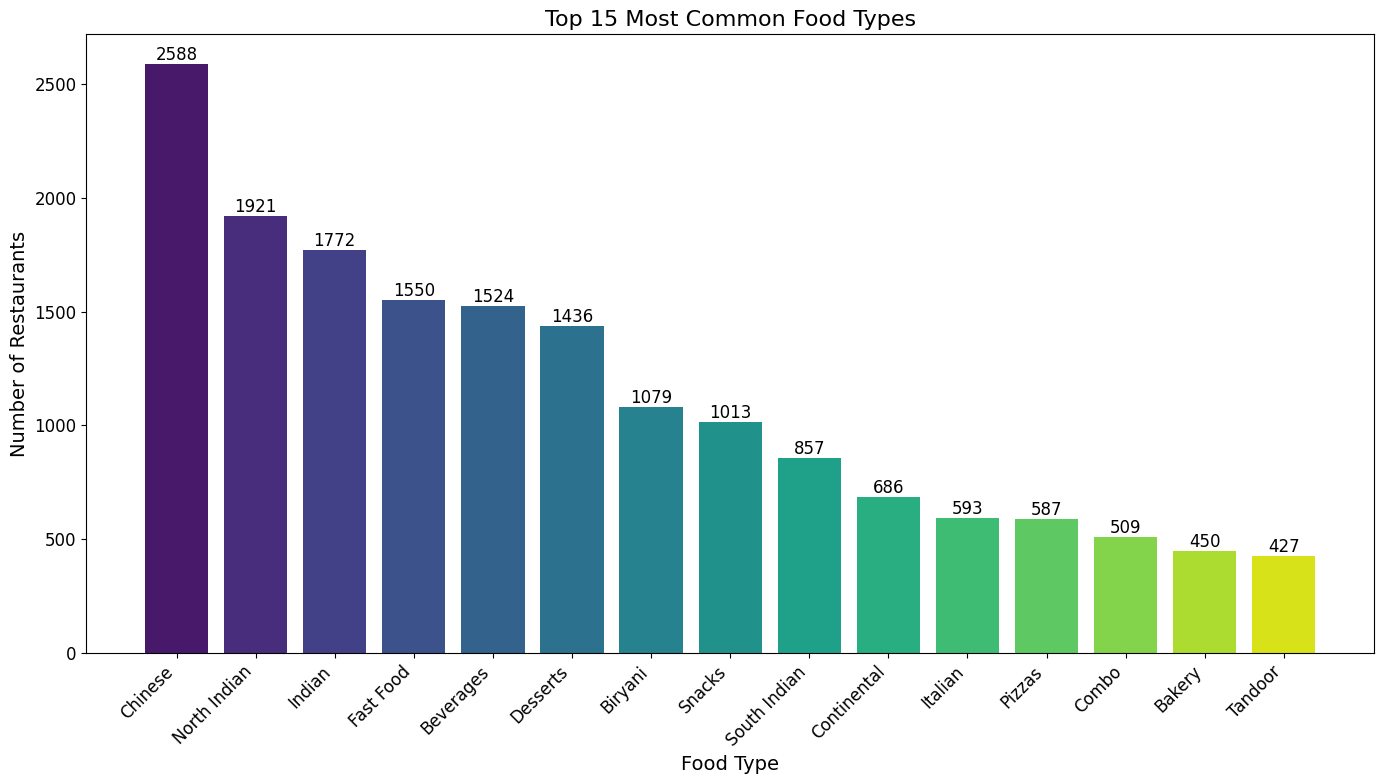

<ipython-input-10-bfefc51b4e39>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_primary_foods.values, y=top_primary_foods.index, ax=axes[0], palette='viridis')
<ipython-input-10-bfefc51b4e39>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ratings.values, y=avg_ratings.index, ax=axes[1], palette='viridis')


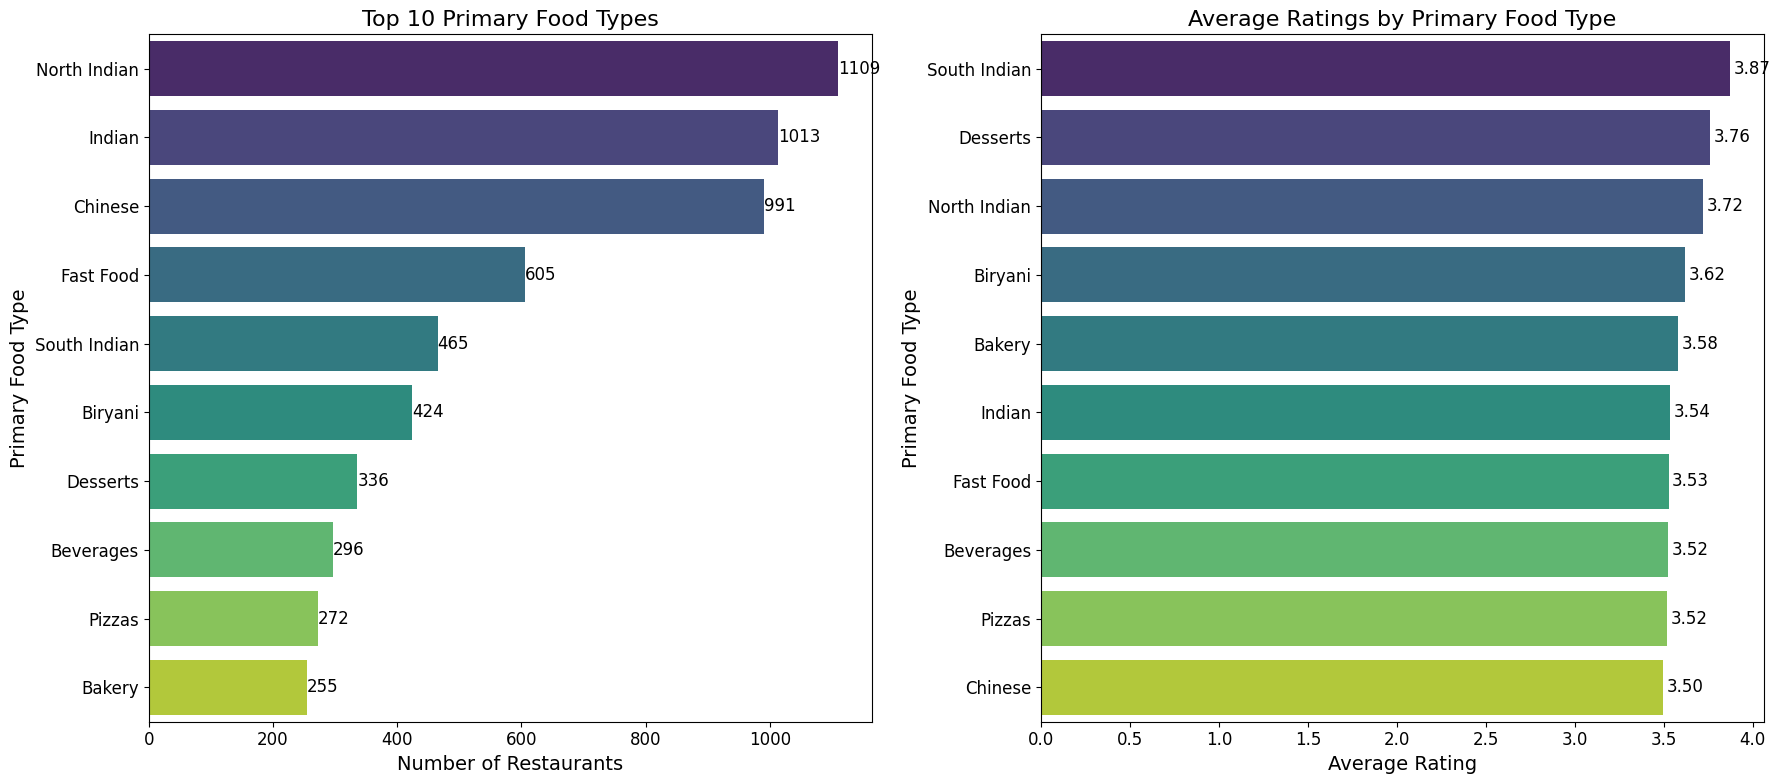

In [ ]:
# Create a function to count food types
def count_food_types(food_list):
    food_dict = {}
    for foods in food_list:
        if isinstance(foods, list):
            for food in foods:
                food = food.strip()
                food_dict[food] = food_dict.get(food, 0) + 1
    return pd.Series(food_dict).sort_values(ascending=False)

food_type_counts = count_food_types(df['Food_type_list'])

# Plot top 15 food types
plt.figure(figsize=(14, 8))
bars = plt.bar(food_type_counts.head(15).index, food_type_counts.head(15).values, color=sns.color_palette("viridis", 15))
plt.title('Top 15 Most Common Food Types')
plt.xlabel('Food Type')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')

# Add value labels to bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1, f"{height:.0f}",
             ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

# Get top 10 primary food types
top_primary_foods = df['Primary_Food'].value_counts().head(10)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot 1: Top 10 primary food types by count
sns.barplot(x=top_primary_foods.values, y=top_primary_foods.index, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Primary Food Types')
axes[0].set_xlabel('Number of Restaurants')
axes[0].set_ylabel('Primary Food Type')

# Add value annotations
for i, v in enumerate(top_primary_foods.values):
    axes[0].text(v + 0.1, i, f"{v}", va='center')

# Plot 2: Average ratings by primary food type for top 10 types
df_top_foods = df[df['Primary_Food'].isin(top_primary_foods.index)]
avg_ratings = df_top_foods.groupby('Primary_Food')['Avg ratings'].mean().sort_values(ascending=False)

sns.barplot(x=avg_ratings.values, y=avg_ratings.index, ax=axes[1], palette='viridis')
axes[1].set_title('Average Ratings by Primary Food Type')
axes[1].set_xlabel('Average Rating')
axes[1].set_ylabel('Primary Food Type')

# Add value annotations
for i, v in enumerate(avg_ratings.values):
    axes[1].text(v + 0.02, i, f"{v:.2f}", va='center')

plt.tight_layout()
plt.show()

Anlaysis -5 : Price Analysis

<ipython-input-11-85095f59a4a1>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='City', y='Price', palette='viridis')


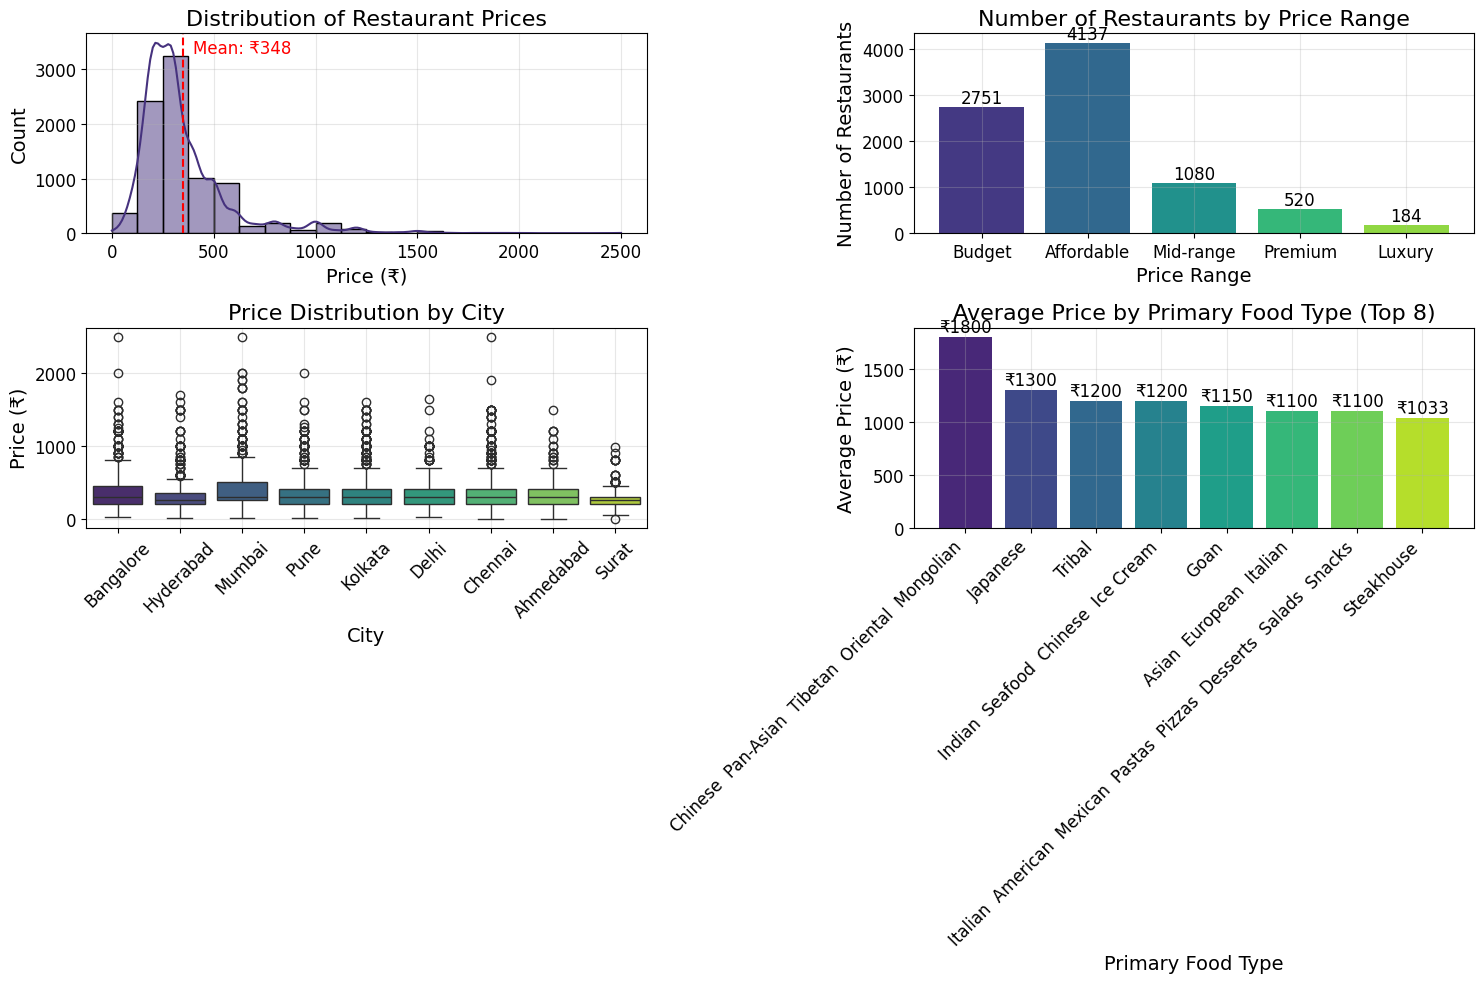

Shapiro-Wilk Test for Price Distribution:
Statistic: 0.7486
P-value: 0.0000
Result: The price distribution is not normally distributed (rejects null hypothesis)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 8680.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
plt.figure(figsize=(15, 10))

# Create a 2x2 subplot grid
plt.subplot(2, 2, 1)
# Distribution of prices
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Restaurant Prices')
plt.xlabel('Price (₹)')
plt.ylabel('Count')
plt.grid(True, alpha=0.3)

# Add mean line and annotation
mean_price = df['Price'].mean()
plt.axvline(mean_price, color='red', linestyle='--')
plt.text(mean_price + 50, plt.ylim()[1] * 0.9, f'Mean: ₹{mean_price:.0f}', color='red')

plt.subplot(2, 2, 2)
# Distribution by price range
price_range_counts = df['Price_Range'].value_counts().sort_index()
bars = plt.bar(price_range_counts.index, price_range_counts.values, color=sns.color_palette("viridis", 5))
plt.title('Number of Restaurants by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.grid(True, alpha=0.3)

# Add value labels to bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5, f"{height:.0f}",
             ha='center', va='bottom')

plt.subplot(2, 2, 3)
# Price by city using box plot
sns.boxplot(data=df, x='City', y='Price', palette='viridis')
plt.title('Price Distribution by City')
plt.xlabel('City')
plt.ylabel('Price (₹)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
# Average price by food type (top 8)
top_foods_price = df.groupby('Primary_Food')['Price'].mean().sort_values(ascending=False).head(8)
bars = plt.bar(top_foods_price.index, top_foods_price.values, color=sns.color_palette("viridis", 8))
plt.title('Average Price by Primary Food Type (Top 8)')
plt.xlabel('Primary Food Type')
plt.ylabel('Average Price (₹)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')

# Add value labels to bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10, f"₹{height:.0f}",
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Shapiro-Wilk test for normality on prices
statistic, p_value = stats.shapiro(df['Price'])
print("Shapiro-Wilk Test for Price Distribution:")
print(f"Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: The price distribution is not normally distributed (rejects null hypothesis)")
else:
    print("Result: The price distribution is normally distributed (fails to reject null hypothesis)")

Analysis - 6 : Correlation Analysis

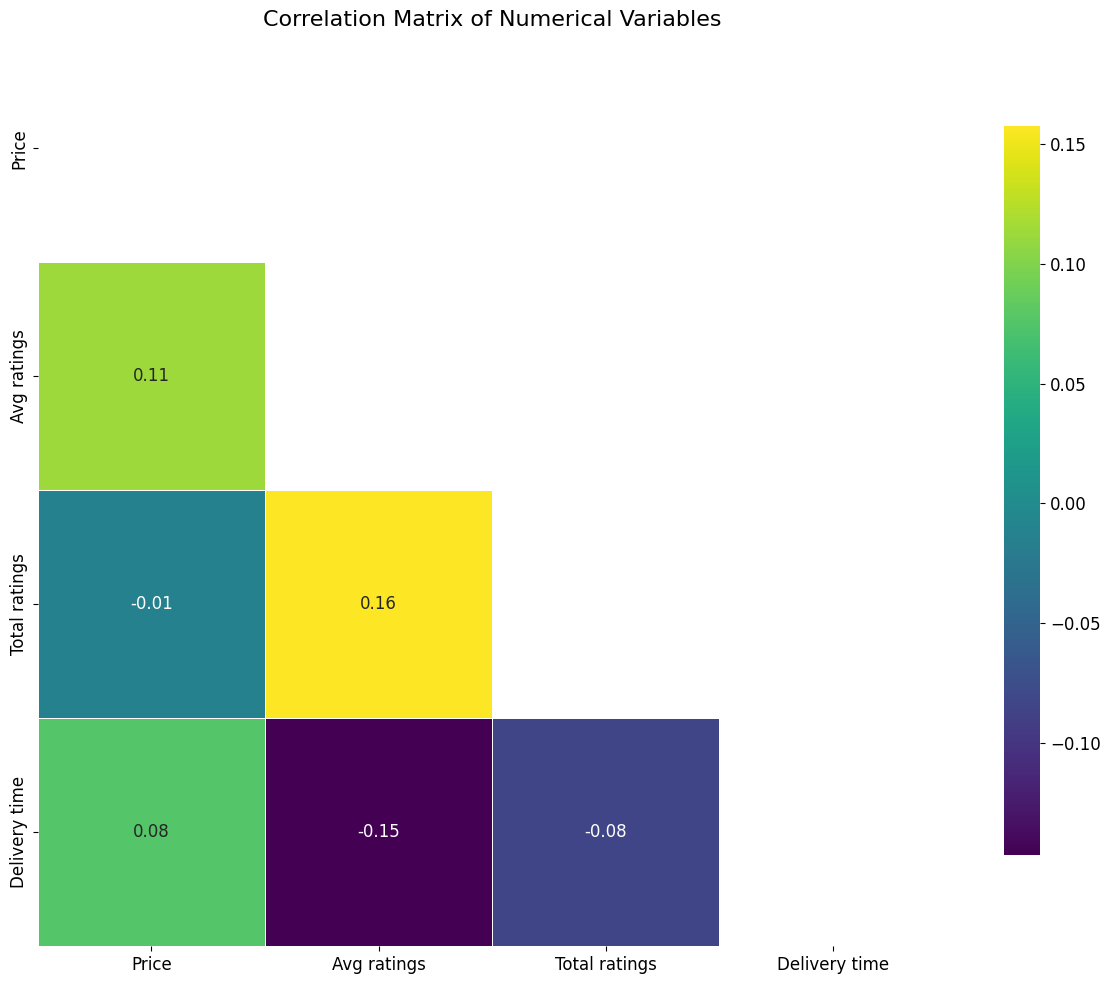

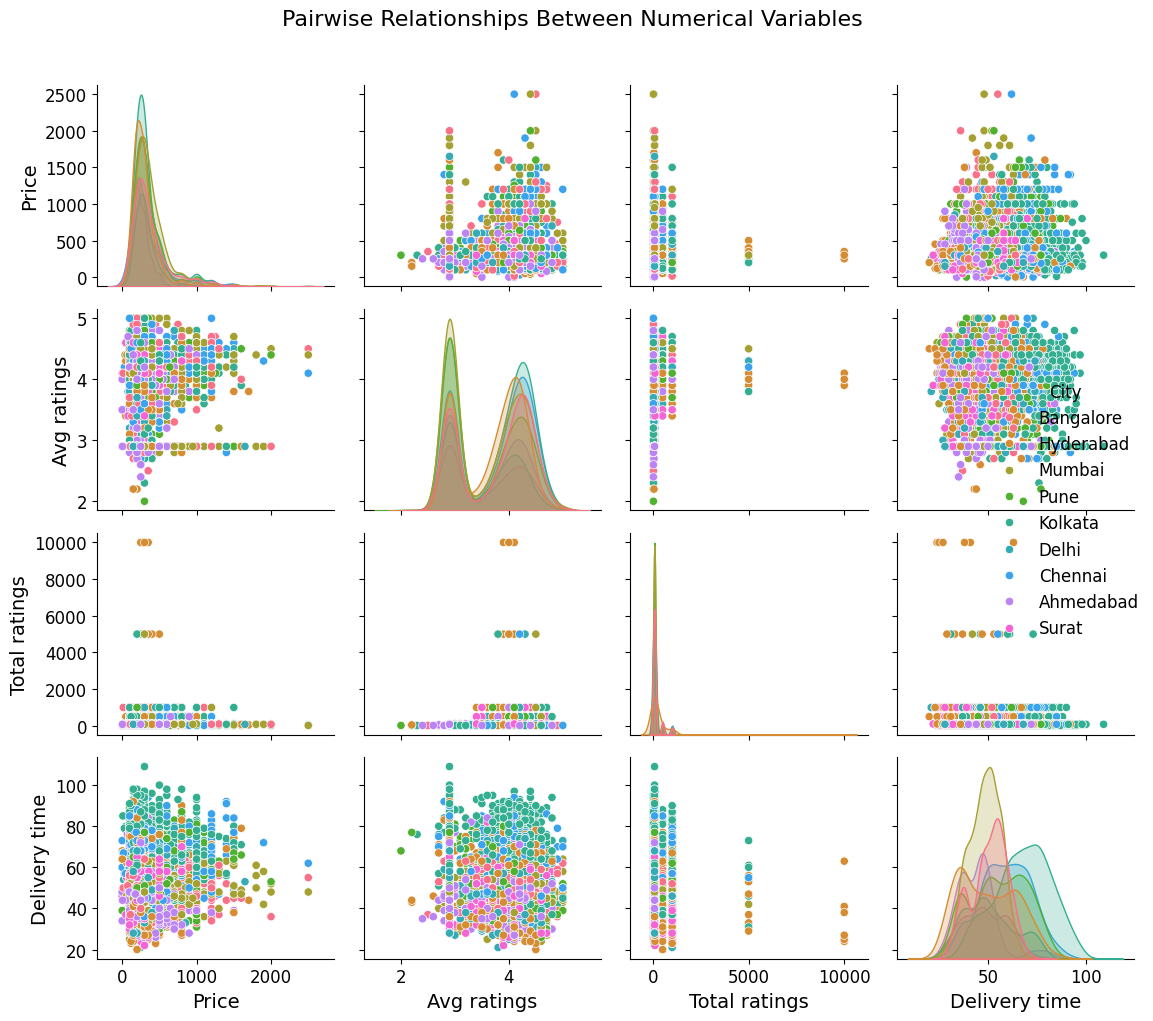

Correlation Analysis:
Price vs Avg ratings: 0.114 - Weak correlation
Price vs Total ratings: -0.015 - Very weak correlation
Price vs Delivery time: 0.076 - Very weak correlation
Avg ratings vs Total ratings: 0.158 - Weak correlation
Avg ratings vs Delivery time: -0.147 - Weak correlation
Total ratings vs Delivery time: -0.084 - Very weak correlation


In [ ]:
# Select numeric columns for correlation
numeric_cols = ['Price', 'Avg ratings', 'Total ratings', 'Delivery time']
correlation = df[numeric_cols].corr()

# Create a nicer looking heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5,
            mask=mask, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

# Create a pairplot for more detailed view of relationships
sns.pairplot(df[numeric_cols + ['City']], hue='City', height=2.5, diag_kind='kde')
plt.suptitle('Pairwise Relationships Between Numerical Variables', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

print("Correlation Analysis:")
# Loop through all pairs and print correlations with interpretation
for i, col1 in enumerate(numeric_cols):
    for col2 in numeric_cols[i+1:]:
        corr_val = correlation.loc[col1, col2]
        print(f"{col1} vs {col2}: {corr_val:.3f}", end=" - ")

        # Interpretation
        if abs(corr_val) < 0.1:
            print("Very weak correlation")
        elif abs(corr_val) < 0.3:
            print("Weak correlation")
        elif abs(corr_val) < 0.5:
            print("Moderate correlation")
        elif abs(corr_val) < 0.7:
            print("Strong correlation")
        else:
            print("Very strong correlation")

Price Prediction Model

Linear Regression Model for Price Prediction:
Training R-squared: 0.0222
Testing R-squared: 0.0227

Feature Importance:


,Feature,Coefficient
0,Avg ratings,30.352210
1,Total ratings,-7.597262
2,Delivery time,20.733078


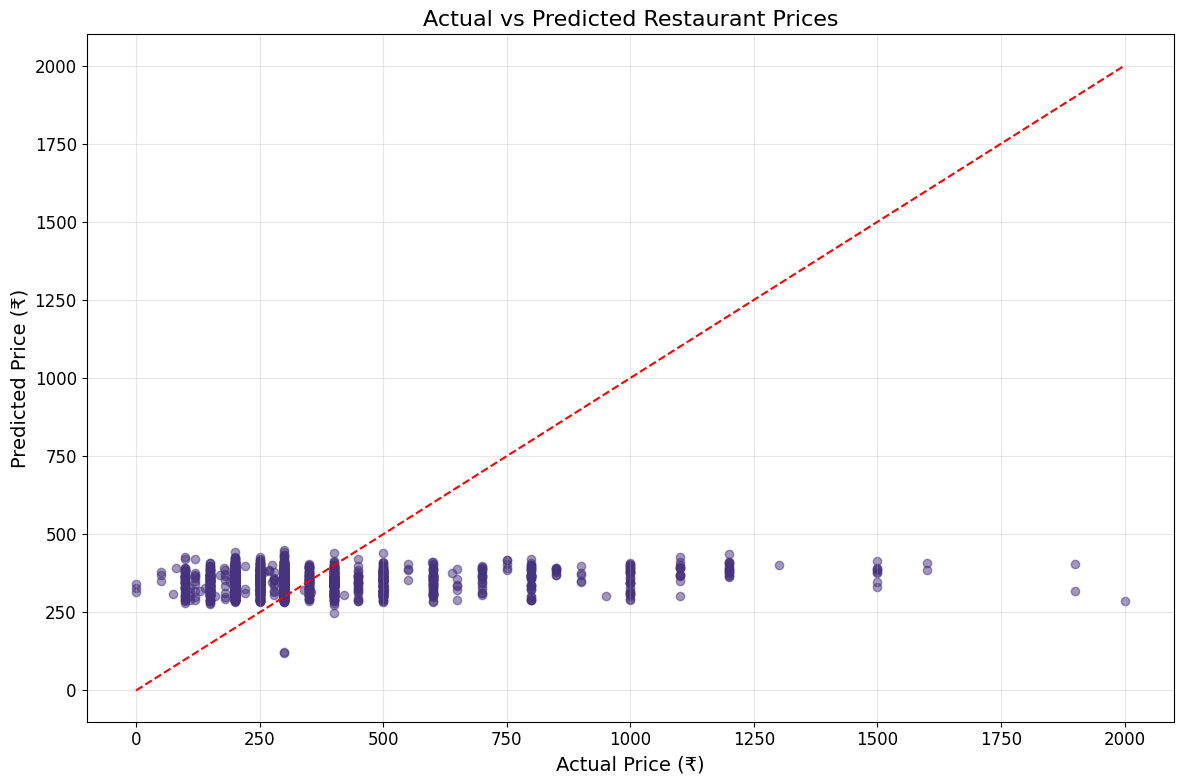


Model Performance Metrics:
Mean Squared Error: 54406.97
Root Mean Squared Error: 233.25
Mean Absolute Error: 157.39


In [ ]:
# Prepare features for modeling
X = df[['Avg ratings', 'Total ratings', 'Delivery time']]
y = df['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Calculate R-squared score
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print("Linear Regression Model for Price Prediction:")
print(f"Training R-squared: {train_score:.4f}")
print(f"Testing R-squared: {test_score:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print("\nFeature Importance:")
display(feature_importance)

# Create predictions for test set
y_pred = model.predict(X_test_scaled)

# Plot actual vs predicted values
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Restaurant Prices')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Predicted Price (₹)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Evaluate model performance
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")

Analysis - 7 :Restaurant Clustering

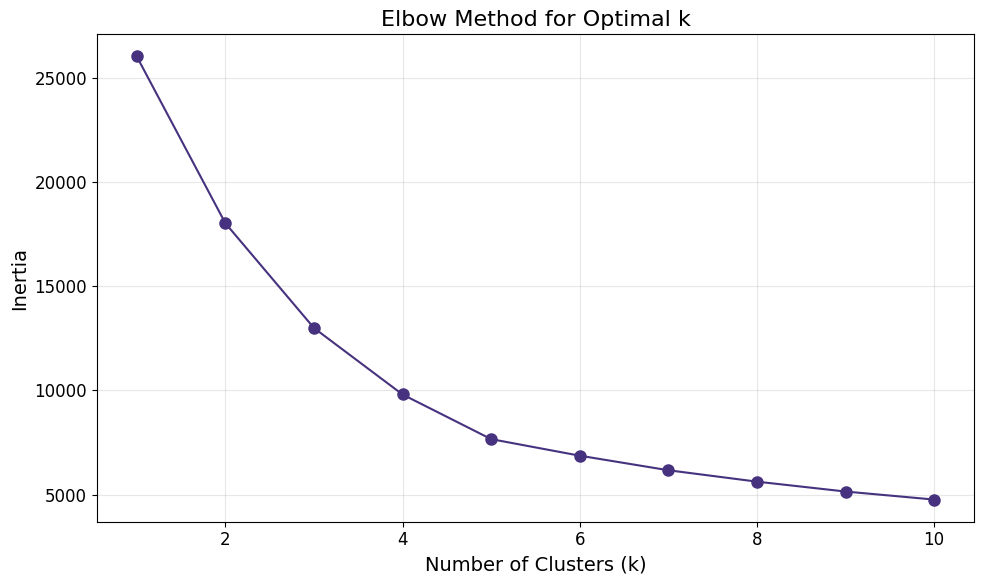

Cluster Analysis:


,Price,Avg ratings,Delivery time,Count
Cluster,,,,
0,297.865891,3.576518,73.117409,1976
1,303.819574,4.178752,45.521986,3525
2,289.132370,2.925068,49.824287,2561
3,1010.490291,3.944822,58.072816,618



Cluster Labels with Characteristics:
Cluster 0 - Budget Standard:
  Average Price: ₹297.87
  Average Rating: 3.58
  Average Delivery Time: 73.12 minutes
  Number of Restaurants: 1976

Cluster 1 - Budget Quick-Service:
  Average Price: ₹303.82
  Average Rating: 4.18
  Average Delivery Time: 45.52 minutes
  Number of Restaurants: 3525

Cluster 2 - Budget Quick-Service:
  Average Price: ₹289.13
  Average Rating: 2.93
  Average Delivery Time: 49.82 minutes
  Number of Restaurants: 2561

Cluster 3 - Premium Standard:
  Average Price: ₹1010.49
  Average Rating: 3.94
  Average Delivery Time: 58.07 minutes
  Number of Restaurants: 618



<Figure size 1500x1000 with 0 Axes>

In [19]:
# Select features for clustering
features = df[['Price', 'Avg ratings', 'Delivery time']].copy()

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Find optimal number of clusters using elbow method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-', markersize=8)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Apply K-means clustering with the optimal number of clusters (4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Analyze clusters
plt.figure(figsize=(15, 10))

# 3D scatter plot using plotly
import plotly.express as px
fig = px.scatter_3d(df, x='Price', y='Avg ratings', z='Delivery time',
                    color='Cluster', symbol='City',
                    hover_name='Restaurant', hover_data=['Area', 'Primary_Food'],
                    labels={'Price': 'Price (₹)', 'Avg ratings': 'Rating', 'Delivery time': 'Delivery Time (min)'},
                    title='Restaurant Clusters based on Price, Rating, and Delivery Time')
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
fig.show()

# Analyze cluster characteristics
cluster_analysis = df.groupby('Cluster').agg({
    'Price': 'mean',
    'Avg ratings': 'mean',
    'Delivery time': 'mean',
    'Restaurant': 'count'
}).rename(columns={'Restaurant': 'Count'})

print("Cluster Analysis:")
display(cluster_analysis)

# Create radar chart to visualize cluster characteristics
fig = go.Figure()

# Normalize data for radar chart
cluster_radar = cluster_analysis.copy()
for col in cluster_radar.columns[:-1]:  # Exclude Count column
    if col == 'Delivery time':  # Lower is better for delivery time
        cluster_radar[col] = 1 - ((cluster_radar[col] - cluster_radar[col].min()) /
                               (cluster_radar[col].max() - cluster_radar[col].min()))
    else:  # Higher is better for ratings and count
        cluster_radar[col] = (cluster_radar[col] - cluster_radar[col].min()) / \
                           (cluster_radar[col].max() - cluster_radar[col].min())

# Add traces
for i in range(len(cluster_radar)):
    fig.add_trace(go.Scatterpolar(
        r=cluster_radar.iloc[i, :-1].values.tolist(),
        theta=cluster_radar.columns[:-1].tolist(),
        fill='toself',
        name=f'Cluster {i}'
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='Cluster Characteristics (Normalized)',
    width=800,
    height=600
)

fig.show()

# Add descriptive labels to clusters based on their characteristics
cluster_labels = {
    0: "Unknown",
    1: "Unknown",
    2: "Unknown",
    3: "Unknown"
}

# Determine labels based on the characteristics (modify based on your results)
for i in range(4):
    if cluster_analysis.loc[i, 'Price'] > cluster_analysis['Price'].mean() + 100:
        if cluster_analysis.loc[i, 'Avg ratings'] > 4.0:
            cluster_labels[i] = "Premium High-Rated"
        else:
            cluster_labels[i] = "Premium Standard"
    elif cluster_analysis.loc[i, 'Price'] < cluster_analysis['Price'].mean() - 100:
        if cluster_analysis.loc[i, 'Delivery time'] < cluster_analysis['Delivery time'].mean():
            cluster_labels[i] = "Budget Quick-Service"
        else:
            cluster_labels[i] = "Budget Standard"
    else:
        if cluster_analysis.loc[i, 'Avg ratings'] > 4.0:
            cluster_labels[i] = "Mid-Range High-Rated"
        else:
            cluster_labels[i] = "Mid-Range Standard"

# Print cluster labels with characteristics
print("\nCluster Labels with Characteristics:")
for cluster, label in cluster_labels.items():
    print(f"Cluster {cluster} - {label}:")
    print(f"  Average Price: ₹{cluster_analysis.loc[cluster, 'Price']:.2f}")
    print(f"  Average Rating: {cluster_analysis.loc[cluster, 'Avg ratings']:.2f}")
    print(f"  Average Delivery Time: {cluster_analysis.loc[cluster, 'Delivery time']:.2f} minutes")
    print(f"  Number of Restaurants: {cluster_analysis.loc[cluster, 'Count']}")
    print()

Analysis -8 : Area Performance Score Analysis

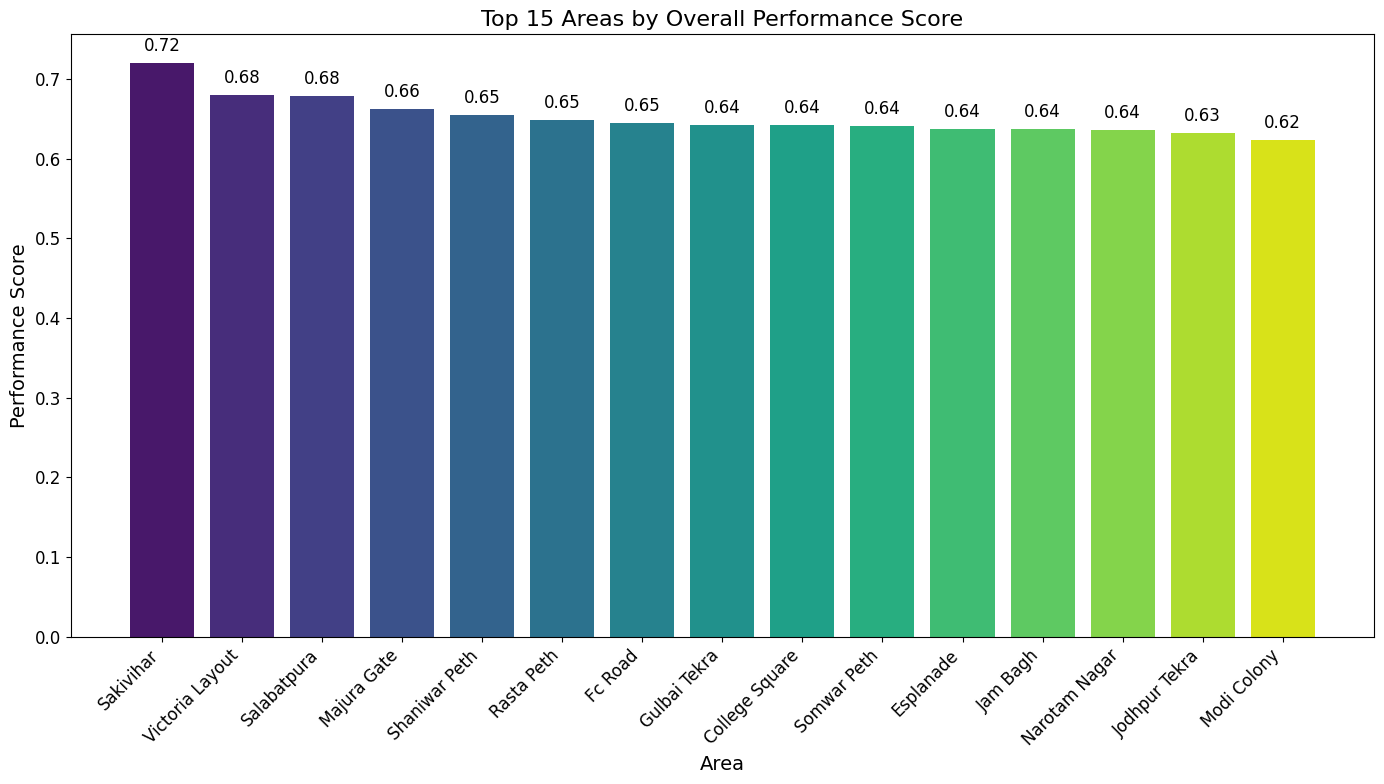

In [ ]:
# Create a function to count unique food types per restaurant
def count_unique_food_types(food_list):
    if isinstance(food_list, list):
        return len(set([food.strip() for food in food_list]))
    return 0

df['Food_Type_Count'] = df['Food_type_list'].apply(count_unique_food_types)

# Create area performance metrics
area_performance = df.groupby('Area').agg({
    'Avg ratings': 'mean',
    'Delivery time': 'mean',
    'Price': 'mean',
    'Food_Type_Count': 'mean',
    'Restaurant': 'count'
}).reset_index()

# Filter areas with at least 2 restaurants
area_performance = area_performance[area_performance['Restaurant'] >= 2]

# Normalize each metric (0-1 scale)
metrics = ['Avg ratings', 'Delivery time', 'Food_Type_Count', 'Restaurant']
for metric in metrics:
    if metric == 'Delivery time':  # Lower is better for delivery time
        area_performance[f'{metric}_norm'] = 1 - ((area_performance[metric] - area_performance[metric].min()) /
                                               (area_performance[metric].max() - area_performance[metric].min()))
    else:  # Higher is better for ratings, food types, and restaurant count
        area_performance[f'{metric}_norm'] = (area_performance[metric] - area_performance[metric].min()) / \
                                           (area_performance[metric].max() - area_performance[metric].min())

# Calculate performance score (weighted average)
weights = {
    'Avg ratings_norm': 0.4,  # 40% weight on ratings
    'Delivery time_norm': 0.3,  # 30% weight on delivery time
    'Food_Type_Count_norm': 0.2,  # 20% weight on food diversity
    'Restaurant_norm': 0.1  # 10% weight on restaurant count
}

area_performance['Performance_Score'] = sum(area_performance[metric] * weight
                                           for metric, weight in weights.items())

# Plot top 15 areas by performance score
top_areas = area_performance.sort_values('Performance_Score', ascending=False).head(15)

plt.figure(figsize=(14, 8))
bars = plt.bar(top_areas['Area'], top_areas['Performance_Score'], color=sns.color_palette("viridis", 15))
plt.title('Top 15 Areas by Overall Performance Score')
plt.xlabel('Area')
plt.ylabel('Performance Score')
plt.xticks(rotation=45, ha='right')

# Add the exact score as text labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.2f}', ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

# Create radar chart for top 5 areas
top5_areas = top_areas.head(5)
metrics_for_radar = ['Avg ratings_norm', 'Delivery time_norm', 'Food_Type_Count_norm', 'Restaurant_norm']
metrics_labels = ['Rating', 'Delivery Time', 'Food Diversity', 'Restaurant Count']

fig = go.Figure()

for i, area in enumerate(top5_areas['Area']):
    area_data = top5_areas[top5_areas['Area'] == area]
    fig.add_trace(go.Scatterpolar(
        r=area_data[metrics_for_radar].values.tolist()[0],
        theta=metrics_labels,
        fill='toself',
        name=area
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    showlegend=True,
    title='Top 5 Areas - Performance Metrics Comparison',
    width=800,
    height=600
)

fig.show()

Analysis - 8: Area Performance Score Analysis

In [ ]:
# Create interactive dashboard for city analysis using plotly
cities = df['City'].value_counts().index.tolist()

# Create a subplot with multiple charts
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        'Average Price by City',
        'Average Rating by City',
        'Delivery Time by City',
        'Restaurant Count by City'
    )
)

# Add bar charts to subplots
# Average Price by City
city_price = df.groupby('City')['Price'].mean().reindex(cities)
fig.add_trace(
    go.Bar(x=cities, y=city_price, marker_color='skyblue', text=city_price.round(0), textposition='auto'),
    row=1, col=1
)

# Average Rating by City
city_rating = df.groupby('City')['Avg ratings'].mean().reindex(cities)
fig.add_trace(
    go.Bar(x=cities, y=city_rating, marker_color='lightgreen', text=city_rating.round(2), textposition='auto'),
    row=1, col=2
)

# Delivery Time by City
city_delivery = df.groupby('City')['Delivery time'].mean().reindex(cities)
fig.add_trace(
    go.Bar(x=cities, y=city_delivery, marker_color='coral', text=city_delivery.round(1), textposition='auto'),
    row=2, col=1
)

# Restaurant Count by City
city_count = df['City'].value_counts().reindex(cities)
fig.add_trace(
    go.Bar(x=cities, y=city_count, marker_color='plum', text=city_count, textposition='auto'),
    row=2, col=2
)

# Update layout
fig.update_layout(
    height=800,
    width=1000,
    title_text='Swiggy Restaurant Analysis Dashboard',
    showlegend=False
)

# Update axes labels
fig.update_yaxes(title_text='Average Price (₹)', row=1, col=1)
fig.update_yaxes(title_text='Average Rating', row=1, col=2)
fig.update_yaxes(title_text='Delivery Time (min)', row=2, col=1)
fig.update_yaxes(title_text='Number of Restaurants', row=2, col=2)

fig.show()

Interactive City Analysis Dashboard

Top Rated Restaurants in Bangalore with Quick Delivery:


,Restaurant,Area,Price,Avg ratings,Delivery time,Food type
1764,Frosty Crumble,Ashok Nagar,450.0,4.9,36,"Desserts,Ice Cream,Beverages"
125,Corner House Ice Cream,Ashok Nagar,250.0,4.7,31,"Ice Cream,Desserts"
6702,Natural Ice Cream,Ashok Nagar,150.0,4.7,31,Ice Cream
7038,Krispy Kreme,Victoria Layout,170.0,4.7,33,"Desserts,Beverages"
777,Happy Belly Bakes- Cakes And Desserts,Ashok Nagar,350.0,4.7,37,"Desserts,Bakery,Beverages"



Affordable Chinese Restaurants in Mumbai:


,Restaurant,Area,Price,Avg ratings,Delivery time,Food type
5821,Montain Kitchen,Chembur,300.0,4.7,54,Chinese
4986,Ministry Of Curry,Chembur,400.0,4.6,49,"Indian,Chinese"
1960,Butterfly High,Bandra Area,300.0,4.5,43,"Indian,South Indian,Chinese,Continental,Desserts"
6648,Hotel Sudarshan,Santacruz East,400.0,4.4,38,"South Indian,Indian,Chinese"
978,Anil Wine N Dine,Saki Naka,300.0,4.4,40,"North Indian,Chinese,Biryani,South Indian"



----- Summary of Key Findings -----
1. Total number of restaurants analyzed: 8680
2. Cities represented: Bangalore, Hyderabad, Mumbai, Pune, Kolkata, Delhi, Chennai, Ahmedabad, Surat
3. Average restaurant price: ₹348.44
4. Average restaurant rating: 3.66/5
5. Average delivery time: 53.97 minutes
6. Most common food type: Chinese
7. City with highest average price: Mumbai (₹393.79)
8. City with highest average rating: Chennai (3.78/5)
9. Area with highest performance score: Sakivihar (Score: 0.72)


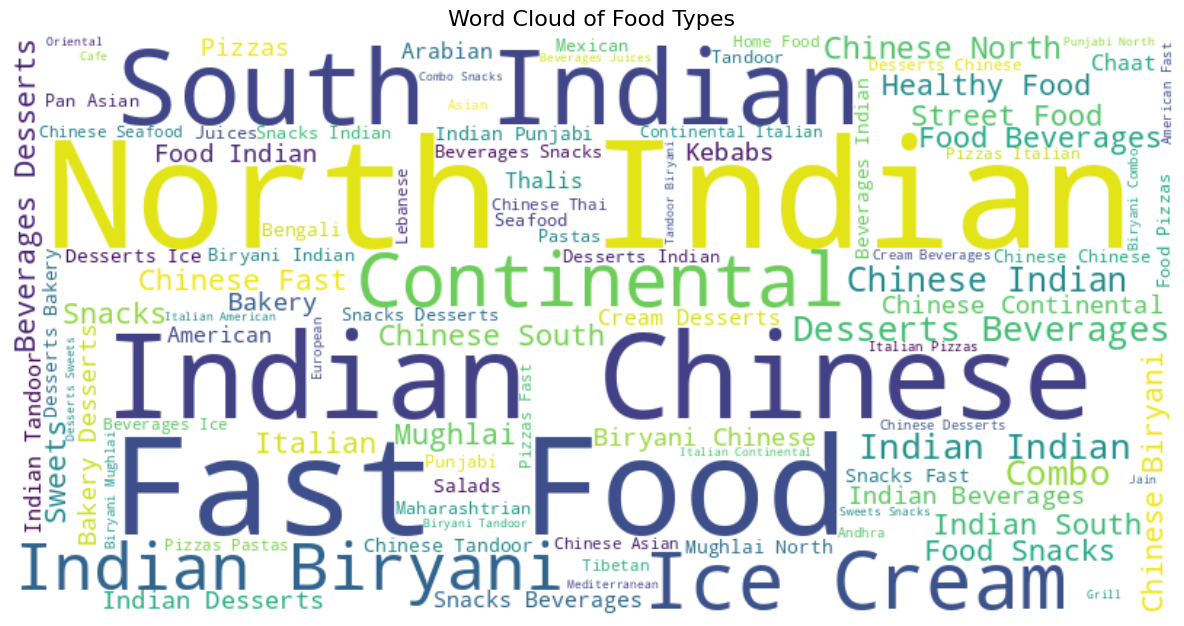

In [ ]:
# Create a function to recommend restaurants based on user preferences
def recommend_restaurants(city, price_range=None, min_rating=None, food_type=None, max_delivery_time=None, n=5):
    """
    Recommend restaurants based on user preferences

    Parameters:
    -----------
    city : str
        City name
    price_range : str, optional
        Budget, Affordable, Mid-range, Premium, or Luxury
    min_rating : float, optional
        Minimum rating (0-5)
    food_type : str, optional
        Type of food (e.g., Chinese, North Indian)
    max_delivery_time : int, optional
        Maximum delivery time in minutes
    n : int, optional
        Number of restaurants to recommend

    Returns:
    --------
    DataFrame with recommended restaurants
    """
    # Filter by city
    recommendations = df[df['City'] == city].copy()

    # Apply filters if provided
    if price_range:
        recommendations = recommendations[recommendations['Price_Range'] == price_range]

    if min_rating:
        recommendations = recommendations[recommendations['Avg ratings'] >= min_rating]

    if food_type:
        # Check if food_type exists in any of the food type lists
        mask = recommendations['Food_type_list'].apply(
            lambda x: food_type in [item.strip() for item in x] if isinstance(x, list) else False
        )
        recommendations = recommendations[mask]

    if max_delivery_time:
        recommendations = recommendations[recommendations['Delivery time'] <= max_delivery_time]

    # Sort by rating (descending) and delivery time (ascending)
    recommendations = recommendations.sort_values(['Avg ratings', 'Delivery time'], ascending=[False, True])

    # Select columns for display
    display_cols = ['Restaurant', 'Area', 'Price', 'Avg ratings', 'Delivery time', 'Food type']

    return recommendations[display_cols].head(n)

# Example: Recommend top-rated restaurants in Bangalore with quick delivery
print("Top Rated Restaurants in Bangalore with Quick Delivery:")
display(recommend_restaurants('Bangalore', min_rating=4.3, max_delivery_time=40))

# Example: Recommend affordable Chinese restaurants in Mumbai
print("\nAffordable Chinese Restaurants in Mumbai:")
display(recommend_restaurants('Mumbai', price_range='Affordable', food_type='Chinese'))

# Summary of key findings
print("\n----- Summary of Key Findings -----")
print(f"1. Total number of restaurants analyzed: {len(df)}")
print(f"2. Cities represented: {', '.join(df['City'].unique())}")
print(f"3. Average restaurant price: ₹{df['Price'].mean():.2f}")
print(f"4. Average restaurant rating: {df['Avg ratings'].mean():.2f}/5")
print(f"5. Average delivery time: {df['Delivery time'].mean():.2f} minutes")
print(f"6. Most common food type: {food_type_counts.index[0]}")
print(f"7. City with highest average price: {avg_price_city.index[0]} (₹{avg_price_city.values[0]:.2f})")
print(f"8. City with highest average rating: {avg_rating_city.index[0]} ({avg_rating_city.values[0]:.2f}/5)")
print(f"9. Area with highest performance score: {top_areas['Area'].iloc[0]} (Score: {top_areas['Performance_Score'].iloc[0]:.2f})")

# Create a WordCloud of food types if you have wordcloud installed
try:
    from wordcloud import WordCloud

    # Prepare text for wordcloud
    food_type_text = ' '.join([food for sublist in df['Food_type_list'].dropna()
                              for food in sublist if isinstance(sublist, list)])

    # Generate wordcloud
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                         colormap='viridis', max_words=100).generate(food_type_text)

    # Display the word cloud
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Food Types', fontsize=16)
    plt.tight_layout()
    plt.show()
except:
    print("Note: Install WordCloud package to generate a word cloud visualization")